## Imports

In [75]:
import numpy as np
import pandas as pd
import networkx as nx
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians
import collections
import scipy


%matplotlib inline

## Loading the datasets

In [3]:
routes = pd.read_csv('routes.dat', header=None)

routes.columns = ['Airline','Airline ID',
                'Source airport',
                'Source airport ID',
                'Destination airport',
                'Destination airport ID',
                'Codeshare',
                'Stops',
                'Equipment']

In [4]:
routes.head()

,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [5]:
airports = pd.read_csv(
    'airports.dat',
    header=None,
    index_col=4,
    na_values='\\N')
airports.columns = ['Airport ID',
                    'Name',
                    'City',
                    'Country',
                    'ICAO',
                    'Latitude',
                    'Longitude',
                    'Altitude',
                    'Timezone',
                    'DST',
                    'TZ',
                    'Type',
                    'Source']

In [6]:
airports.head()

,Airport ID,Name,City,Country,ICAO,Latitude,Longitude,Altitude,Timezone,DST,TZ,Type,Source
4,,,,,,,,,,,,,
GKA,1,Goroka Airport,Goroka,Papua New Guinea,AYGA,-6.081690,145.391998,5282,10.0,U,Pacific/Port_Moresby,airport,OurAirports
MAG,2,Madang Airport,Madang,Papua New Guinea,AYMD,-5.207080,145.789001,20,10.0,U,Pacific/Port_Moresby,airport,OurAirports
HGU,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,AYMH,-5.826790,144.296005,5388,10.0,U,Pacific/Port_Moresby,airport,OurAirports
LAE,4,Nadzab Airport,Nadzab,Papua New Guinea,AYNZ,-6.569803,146.725977,239,10.0,U,Pacific/Port_Moresby,airport,OurAirports
POM,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,AYPY,-9.443380,147.220001,146,10.0,U,Pacific/Port_Moresby,airport,OurAirports


## Cleaning

In [7]:
airports_route = list(set(set(routes['Source airport']) | set(routes['Destination airport'])))

In [8]:
airports_air = list(airports.index)

In [9]:
airports_route

['PJG',
 'KIH',
 'ZCO',
 'UTT',
 'SOU',
 'MBJ',
 'TIU',
 'IAG',
 'UPN',
 'JLN',
 'YCD',
 'SOC',
 'BOH',
 'TOS',
 'SOM',
 'SFN',
 'VAO',
 'TEB',
 'HPB',
 'ALO',
 'FAI',
 'HFA',
 'YRG',
 'YPX',
 'YFB',
 'PJM',
 'TQI',
 'PDG',
 'CJS',
 'MLH',
 'OBU',
 'SEN',
 'SRG',
 'VDS',
 'TLT',
 'BHQ',
 'TRO',
 'HBX',
 'MKW',
 'TSH',
 'CRK',
 'LDH',
 'CMX',
 'TRR',
 'IRK',
 'KPO',
 'LPM',
 'HUY',
 'SQS',
 'CAE',
 'PKZ',
 'YGR',
 'ASW',
 'PPK',
 'GRP',
 'BIR',
 'GSO',
 'ROC',
 'LAR',
 'MVP',
 'SWJ',
 'CMW',
 'YDP',
 'SHR',
 'KWI',
 'YIH',
 'AER',
 'FRD',
 'CDR',
 'YHP',
 'EKS',
 'LEC',
 'SAE',
 'MCE',
 'WBB',
 'MCX',
 'PBC',
 'YWB',
 'DSN',
 'GOT',
 'DIE',
 'MQJ',
 'OAJ',
 'NAH',
 'HET',
 'LBJ',
 'ABM',
 'AMQ',
 'CHY',
 'IJK',
 'DJJ',
 'KAZ',
 'AEX',
 'SAH',
 'PRI',
 'CGQ',
 'MAH',
 'YMN',
 'XKS',
 'NAP',
 'KHS',
 'LGK',
 'BNS',
 'YSO',
 'NJC',
 'THX',
 'IUI',
 'TBG',
 'LHE',
 'KAW',
 'PUU',
 'SEZ',
 'ISU',
 'LMT',
 'ISE',
 'YZS',
 'BTT',
 'PIP',
 'MBS',
 'RIB',
 'HKK',
 'KGI',
 'CLQ',
 'ERZ',
 'TKG',


In [10]:
nodes = list(set(airports_air) & set(airports_route))

In [11]:
routes_clean = routes[(routes['Source airport'].isin(nodes)) & (routes['Destination airport'].isin(nodes))]

In [12]:
airports_clean = airports[airports.index.isin(nodes)]

**Save the clean data**

In [13]:
routes_clean.to_csv('routes_clean.csv', index=False)
airports_clean.to_csv('airports_clean.csv')

## World map

**Load clean data**

In [14]:
routes = pd.read_csv('routes_clean.csv', low_memory=False)

In [15]:
airports = pd.read_csv('airports_clean.csv', index_col=0)

**Get edges from routes and create graph**

In [16]:
edges = routes[['Source airport', 'Destination airport']].values

In [56]:
G = nx.from_edgelist(edges)

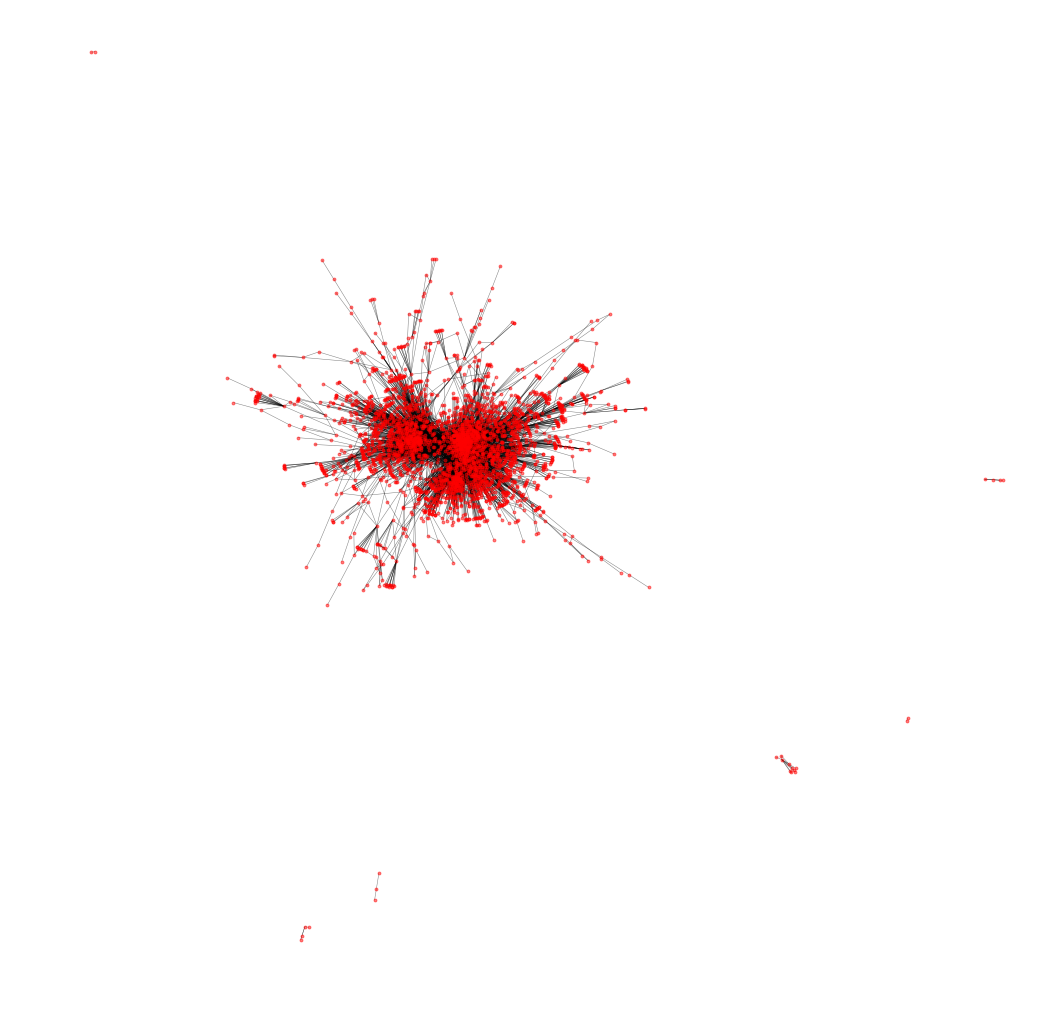

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(18, 18))
nx.draw_networkx(G, ax=ax, node_size=8, alpha=.5,
                 width=.5, with_labels=False)
ax.set_axis_off()

Get largest connected component for the rest

In [19]:
largest_cc = max(nx.connected_component_subgraphs(G), key=len)

To create the map, we first retrieve the coordinates from the airports dataframe

In [140]:
pos = {airport: (v['Longitude'], v['Latitude'])
       for airport, v in
       airports.to_dict('index').items()}

Node size will be the degree of the nodes

In [141]:
deg = nx.degree(largest_cc)
sizes = [5 * deg[iata] for iata in largest_cc.nodes]

Color of the nodes is the altitude

In [142]:
altitude = airports['Altitude']
altitude = [altitude[iata] for iata in largest_cc.nodes]

Display label only if degree is quite big

In [143]:
labels = {iata: iata if deg[iata] >= 200 else ''
          for iata in largest_cc.nodes}

/home/arnaud/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


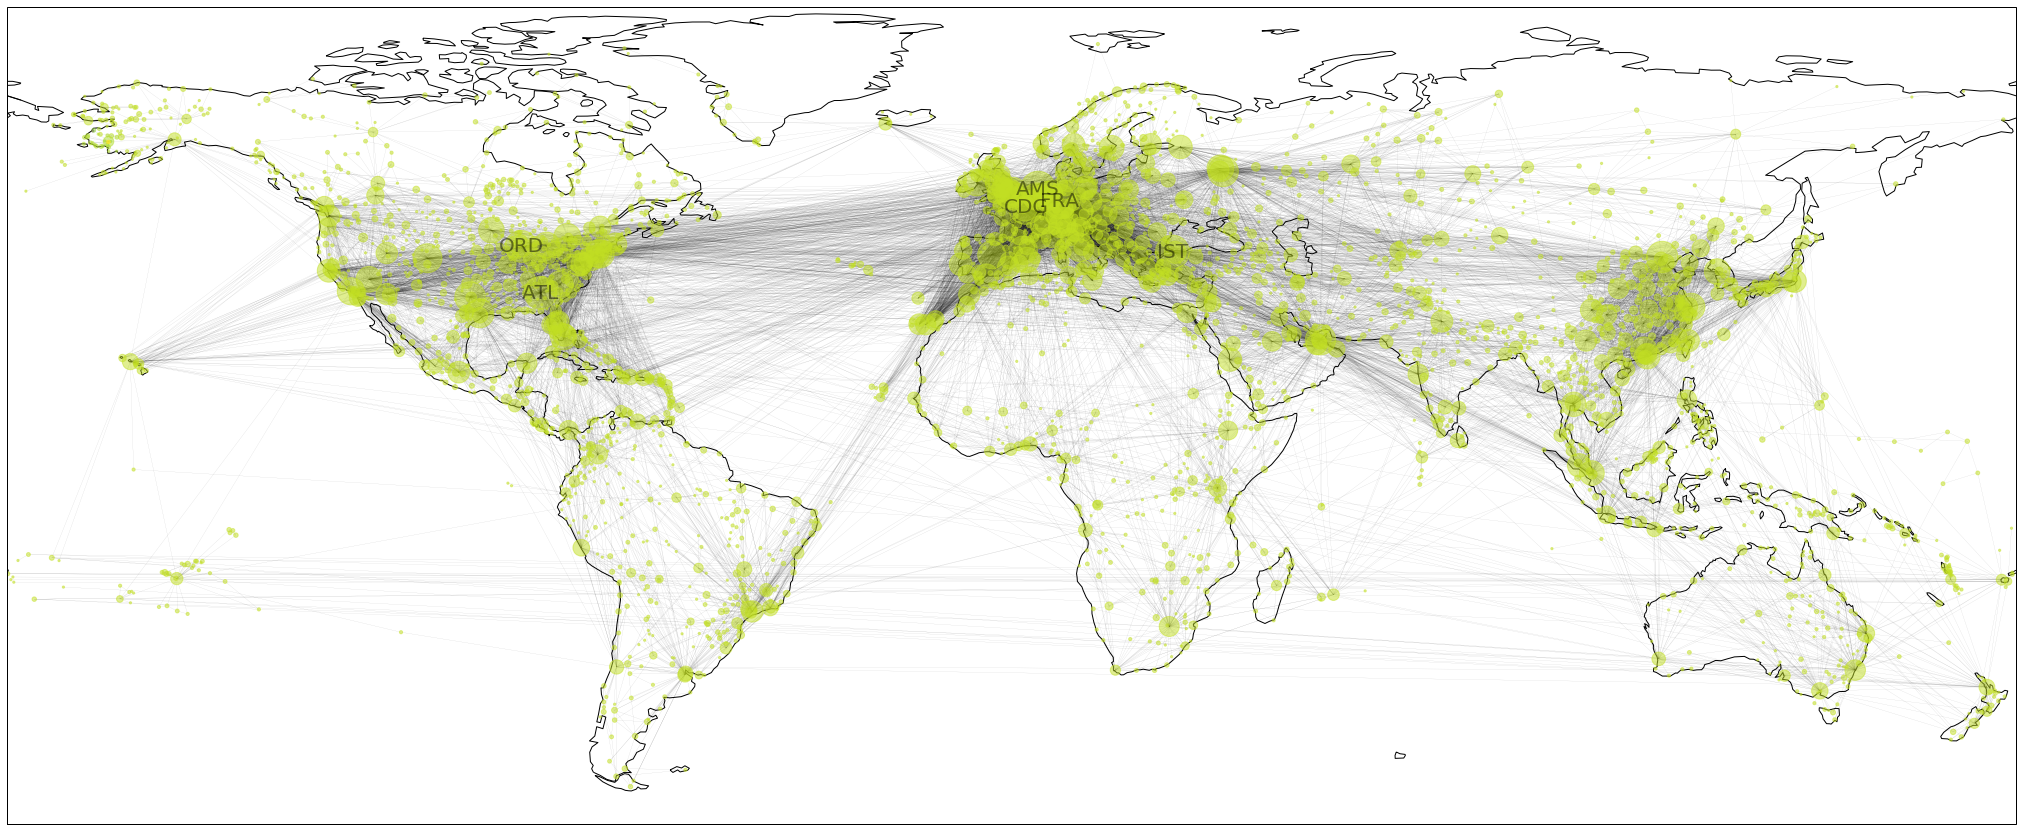

In [170]:
# Map projection
fig, ax = plt.subplots(
    1, 1, figsize=(36, 24),
    subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.coastlines()

# Extent of continental US.
#ax.set_extent([-128, -62, 20, 50])
nx.draw_networkx(largest_cc, ax=ax,
                 font_size=20,
                 alpha=.5,
                 width=.075,
                 node_size=sizes,
                 labels=labels,
                 pos=pos,
                 node_color=U[:,4])

In [174]:
df = routes_clean[['Source airport', 'Destination airport', 'Airline']].groupby(by = ['Source airport', 'Destination airport']).count().sort_values(by=['Airline'], ascending = False)
len(df)

36434

In [182]:
test = routes_clean.copy()

In [181]:
for index, row in df[df['Airline']==1].iterrows():
    test[test['Source airport'] == row['Source airport']]

In [69]:
G = nx.from_pandas_edgelist(routes_clean, 'Source airport', 'Destination airport', ['Distance'])

/home/arnaud/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


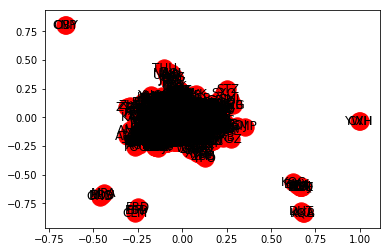

In [53]:
nx.draw_networkx(G)

## Flight distance

In [26]:
routes_clean['Source latitude'] = routes_clean.apply(lambda row : airports_clean[airports_clean['Airport ID'] == int(row['Source airport ID'])].Latitude.values.item(0), axis = 1)
routes_clean['Source longitude'] = routes_clean.apply(lambda row : airports_clean[airports_clean['Airport ID'] == int(row['Source airport ID'])].Longitude.values.item(0), axis = 1)
routes_clean['Destination latitude'] = routes_clean.apply(lambda row : airports_clean[airports_clean['Airport ID'] == int(row['Destination airport ID'])].Latitude.values.item(0), axis = 1)
routes_clean['Destination longitude'] = routes_clean.apply(lambda row : airports_clean[airports_clean['Airport ID'] == int(row['Destination airport ID'])].Longitude.values.item(0), axis = 1)



In [46]:
routes_clean['Distance'] = routes_clean.apply(lambda row : geodesic((row['Source latitude'], row['Source longitude']), (row['Destination latitude'], row['Destination longitude'])).kilometers, axis = 1)

(array([6.1390e+03, 1.0728e+04, 9.9830e+03, 8.2740e+03, 6.6020e+03,
        5.2610e+03, 3.3910e+03, 2.6460e+03, 2.1850e+03, 1.7690e+03,
        1.3180e+03, 8.6300e+02, 6.8400e+02, 4.3600e+02, 3.3400e+02,
        2.9700e+02, 3.3300e+02, 3.3700e+02, 4.3300e+02, 4.5800e+02,
        3.9400e+02, 3.5600e+02, 2.6900e+02, 3.0700e+02, 3.4900e+02,
        3.0900e+02, 2.0800e+02, 2.5500e+02, 2.4100e+02, 2.1200e+02,
        8.3000e+01, 1.0000e+02, 1.1400e+02, 6.8000e+01, 1.0000e+02,
        6.5000e+01, 4.8000e+01, 4.4000e+01, 1.0000e+01, 2.6000e+01,
        2.2000e+01, 8.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00]),
 array([    0.        ,   321.79771158,   643.59542316,   965.39313474,
         1287.19084632,  1608.9885579 ,  1930.78626948,  2252.58398106,
         2574.38169264,  2896.17940422,  3217.9771158 ,  3539.77482738,
         3861.57253896,  4183.37025054,  4505.16796212,  4826.9656737 ,
         5148.76338528,  5470.

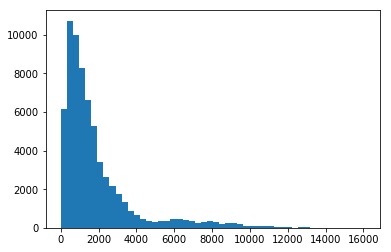

In [47]:
plt.hist(routes_clean['Distance'].values, bins = 50)

## Local/international flights

In [28]:
routes_clean['Source country'] = routes_clean.apply(lambda row : airports_clean[airports_clean['Airport ID'] == int(row['Source airport ID'])].Country.values.item(0), axis = 1)
routes_clean['Destination country'] = routes_clean.apply(lambda row : airports_clean[airports_clean['Airport ID'] == int(row['Destination airport ID'])].Country.values.item(0), axis = 1)

In [29]:
routes_clean['International flight'] = routes_clean.apply(lambda row : not (row['Source country'] == row['Destination country']), axis = 1)

In [30]:
routes_clean['International flight'].value_counts()

True     34222
False    31845
Name: International flight, dtype: int64

In [31]:
collections.Counter(routes_clean['Source country']).most_common(10)

[('United States', 12999),
 ('China', 7995),
 ('United Kingdom', 2634),
 ('Spain', 2525),
 ('Germany', 2328),
 ('France', 1924),
 ('Canada', 1835),
 ('Russia', 1793),
 ('Italy', 1770),
 ('Brazil', 1385)]

In [32]:
collections.Counter(routes_clean['Destination country']).most_common(10)

[('United States', 12994),
 ('China', 7995),
 ('United Kingdom', 2608),
 ('Spain', 2527),
 ('Germany', 2312),
 ('France', 1920),
 ('Canada', 1844),
 ('Russia', 1800),
 ('Italy', 1773),
 ('Brazil', 1382)]

In [33]:
collections.Counter(routes_clean['Source airport']).most_common(10)

[('ATL', 915),
 ('ORD', 556),
 ('CDG', 523),
 ('LHR', 523),
 ('PEK', 520),
 ('LAX', 489),
 ('FRA', 489),
 ('DFW', 469),
 ('JFK', 454),
 ('AMS', 450)]

In [34]:
collections.Counter(routes_clean['Destination airport']).most_common(10)

[('ATL', 911),
 ('ORD', 548),
 ('LHR', 520),
 ('PEK', 519),
 ('CDG', 516),
 ('LAX', 497),
 ('FRA', 485),
 ('DFW', 467),
 ('JFK', 453),
 ('AMS', 446)]

In [35]:
routes_clean[['Source airport', 'Source airport ID', 'Source country']].groupby(['Source airport', 'Source country']).count().sort_values(by = ['Source airport ID'], ascending = False)

,,Source airport ID
Source airport,Source country,
ATL,United States,915
ORD,United States,556
LHR,United Kingdom,523
CDG,France,523
PEK,China,520
LAX,United States,489
FRA,Germany,489
DFW,United States,469
JFK,United States,454


In [64]:
routes_clean

,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops,Equipment,Source latitude,Source longitude,Destination latitude,Destination longitude,Distance,Source country,Destination country,International flight
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2,43.449902,39.956600,55.606201,49.278702,1507.989717,Russia,Russia,False
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2,46.283298,48.006302,55.606201,49.278702,1040.943207,Russia,Russia,False
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2,46.283298,48.006302,44.225101,43.081902,449.036664,Russia,Russia,False
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2,55.305801,61.503300,55.606201,49.278702,773.126239,Russia,Russia,False
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2,55.305801,61.503300,55.012600,82.650703,1343.161122,Russia,Russia,False
5,2B,410,DME,4029,KZN,2990,NaN,0,CR2,55.408798,37.906300,55.606201,49.278702,718.084202,Russia,Russia,False
6,2B,410,DME,4029,NBC,6969,NaN,0,CR2,55.408798,37.906300,55.564701,52.092499,895.419005,Russia,Russia,False
8,2B,410,DME,4029,UUA,6160,NaN,0,CR2,55.408798,37.906300,54.639999,52.801701,954.628750,Russia,Russia,False
9,2B,410,EGO,6156,KGD,2952,NaN,0,CR2,50.643799,36.590099,54.889999,20.592600,1175.219692,Russia,Russia,False
10,2B,410,EGO,6156,KZN,2990,NaN,0,CR2,50.643799,36.590099,55.606201,49.278702,1010.815885,Russia,Russia,False


## Laplacian / distance

In [160]:
largest_cc = max(nx.connected_component_subgraphs(G), key=len)
laplacian = nx.laplacian_matrix(largest_cc, weight= 'Distance').toarray()

In [161]:
e, U =  scipy.linalg.eigh(laplacian)

In [120]:
# Indice of the first non-zero eigenvalue
lambda_1_ind = 1

# Laplacian eigenmaps
coords = U[:, lambda_1_ind:lambda_1_ind+2]

def plot_signal(signal):
    """Display nodes of the graph in 2D
    together with the given signal"""
    
    nodes = nx.draw_networkx_nodes(largest_cc, dict(zip(largest_cc.nodes, coords)), node_size=30, node_color=signal)
    plt.xlabel('Value of $\lambda_1$')
    plt.ylabel('Value of $\lambda_2$')
    plt.colorbar(nodes)



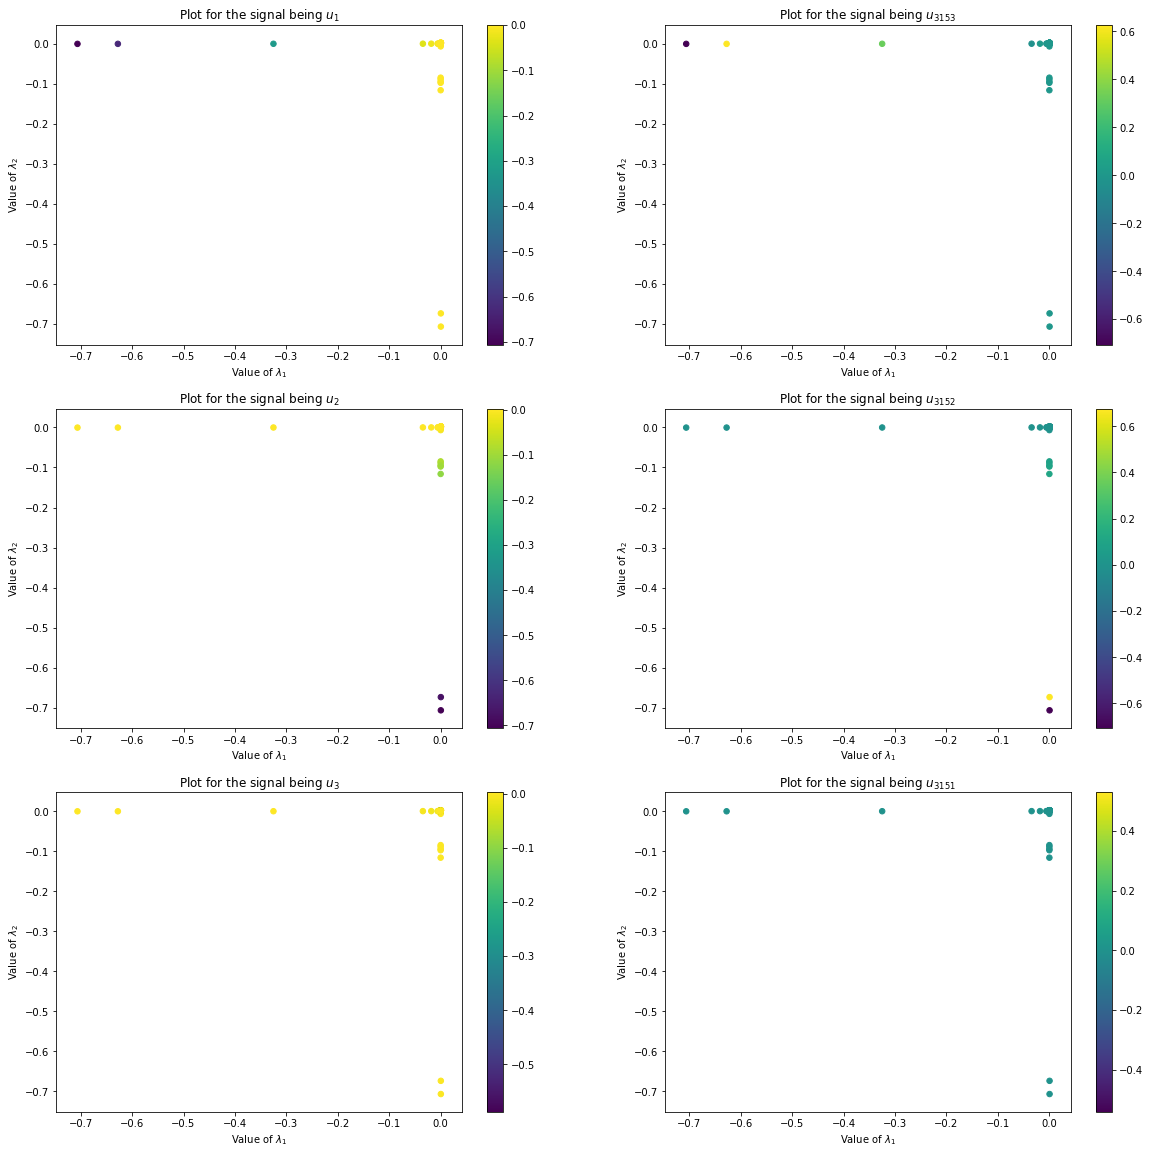

In [121]:
plt.figure(figsize=(20, 20))

# Plot the first 3 Fourier basis vectors
for i in range(3):
    plt.subplot(321 + 2*i)
    plot_signal(U[:, lambda_1_ind + i])
    plt.title('Plot for the signal being $u_{'+ str(lambda_1_ind + i)+'}$')

    # Plot the last 3 Fourier basis vectors
for i in range(3):
    plt.subplot(322 + 2*i)
    plot_signal(U[:, len(largest_cc) - (i + 1)])
    plt.title('Plot for the signal being $u_{'+ str(len(largest_cc) - (i + 1))+'}$')

plt.show()



In [137]:
_max = np.max(U[:1])
_min = np.min(U[:1])
V = (U[:1]-_min)/(_max- _min)
V.flatten()

array([0.3143249 , 0.41261039, 0.41432836, ..., 0.41221025, 0.41221599,
       0.41221525])

/home/arnaud/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


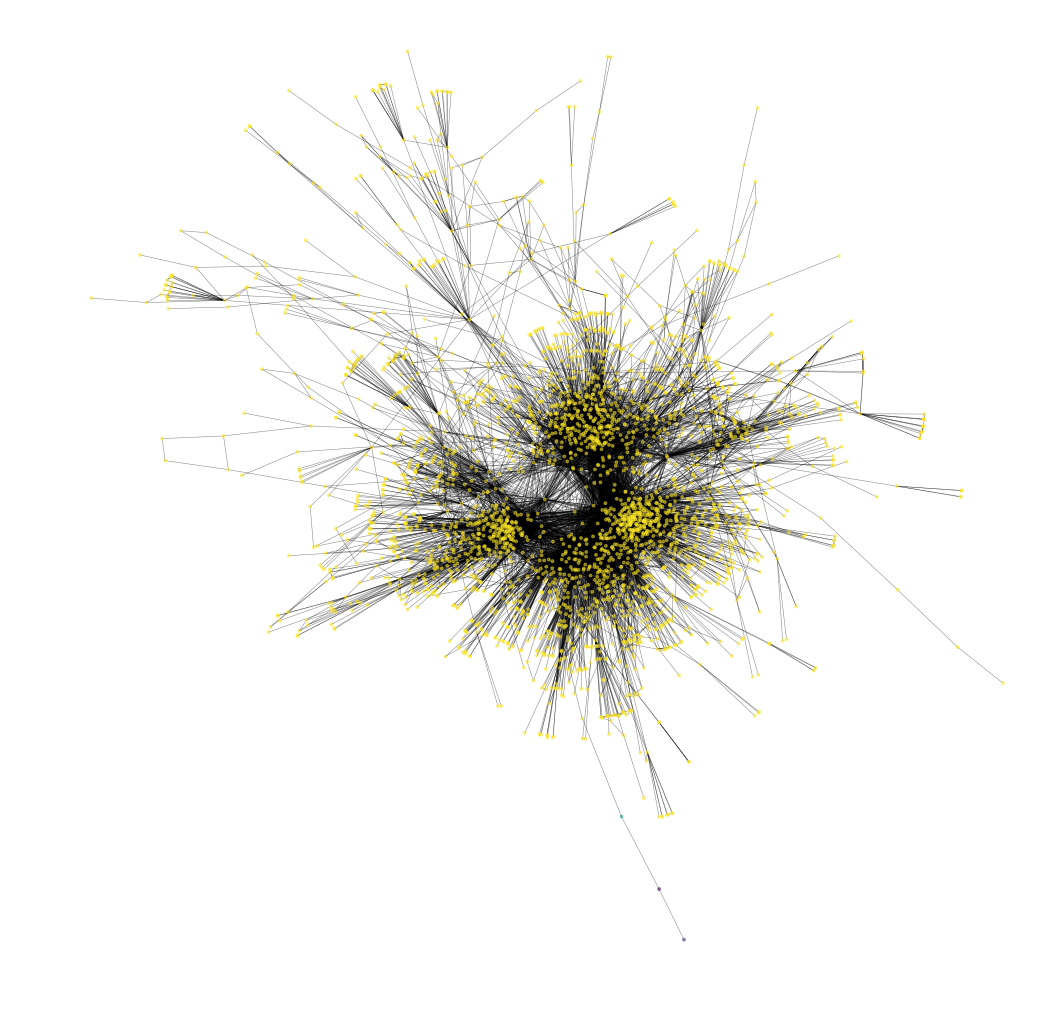

In [139]:
fig, ax = plt.subplots(1, 1, figsize=(18, 18))
nx.draw(largest_cc, node_color = U[:,1], ax=ax, node_size=8, alpha=.5,
                 width=.5, with_labels=False, )
ax.set_axis_off()

In [159]:
routes_clean.Stops.value_counts()

0    66056
1       11
Name: Stops, dtype: int64

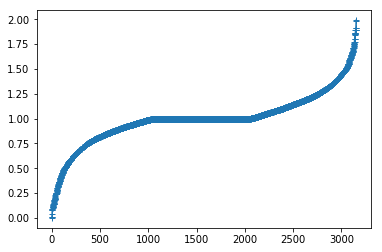

In [123]:
plt.plot(e, '+-')

/home/arnaud/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


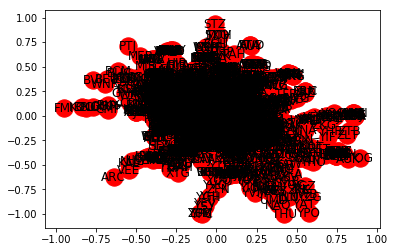

In [89]:
nx.draw_networkx(largest_cc)

In [100]:
len(largest_cc.nodes)

3154

In [101]:
cluster = np.load(clustered.npy)

NameError: name 'clustered' is not defined